In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Embedding # new!
from keras.callbacks import ModelCheckpoint # new! 
import os # new! 
from sklearn.metrics import roc_auc_score, roc_curve # new!
import pandas as pd
import matplotlib.pyplot as plt # new!
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# training:
epochs = 4
batch_size = 128

# vector-space embedding: 
n_dim = 64
n_unique_words = 5000 # as per Maas et al. (2011); may not be optimal
n_words_to_skip = 50 # ditto
max_review_length = 100
pad_type = trunc_type = 'pre'

# neural network architecture: 
n_dense = 64
dropout = 0.5

In [15]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words, skip_top=n_words_to_skip)

In [16]:
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

In [17]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))
# model.add(Dense(n_dense, activation='relu'))
# model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid')) # mathematically equivalent to softmax with two classes

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                409664    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 729,729
Trainable params: 729,729
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
modelcheckpoint = ModelCheckpoint(filepath="/weights.dnn.{epoch:02d}.hdf5")

In [21]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 6s 28ms/step - loss: 0.6690 - accuracy: 0.5528 - val_loss: 0.3724 - val_accuracy: 0.8330
Epoch 2/4
196/196 [==============================] - 4s 23ms/step - loss: 0.3081 - accuracy: 0.8765 - val_loss: 0.3393 - val_accuracy: 0.8508
Epoch 3/4
196/196 [==============================] - 4s 22ms/step - loss: 0.1558 - accuracy: 0.9510 - val_loss: 0.4153 - val_accuracy: 0.8356
Epoch 4/4
196/196 [==============================] - 4s 23ms/step - loss: 0.0356 - accuracy: 0.9935 - val_loss: 0.5289 - val_accuracy: 0.8330


In [22]:
model.load_weights("/weights.dnn.04.hdf5") # zero-indexed

In [23]:
y_hat = model.predict_proba(x_valid)

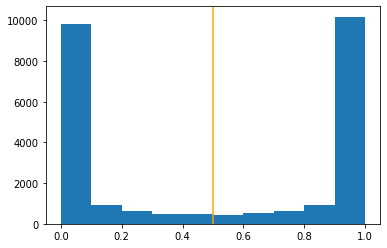

In [24]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [25]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'91.40'